In [1]:
pip install yfinance

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense

In [4]:
print("Downloading stock data....")
data=yf.download('GOOG',start='2018-01-01',end='2024-01-01')
data_close=data['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(data_close)

In [6]:
def create_sequences(data,seq_length):
    x=[]
    y=[]
    for i in range(seq_length ,len(data)):
        x.append(data[i-seq_length:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

In [8]:
sequence_length=30
X,y=create_sequences(scaled_data,sequence_length)

In [9]:
X=np.reshape(X,(X.shape[0],X.shape[1],1))

In [10]:
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [12]:
model=Sequential([
SimpleRNN(units=50,return_sequences=False,input_shape=(X_train.shape[1],1)),
Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("Training the model....")
history=model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Training the model....
Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0707 - val_loss: 0.0018
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7952e-04 - val_loss: 0.0016
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.5862e-04 - val_loss: 0.0015
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7150e-04 - val_loss: 0.0015
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3929e-04 - val_loss: 0.0015
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.9423e-04 - val_loss: 0.0015
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.7274e-04 - val_loss: 0.0012
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.2149e-04 - val_loss: 0.0012
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.5542e-04 - val_loss: 0.0012
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.9518e-04 - val_loss: 0.0012
Epoch 12/2

In [15]:
print("Predicting stock prices....")
predicted_stock_prices=model.predict(X_test)
predicted_stock_prices=scalar.inverse_transform(predicted_stock_prices.reshape(-1,1))
real_stock_prices=scalar.inverse_transform(y_test.reshape(-1,1))

Predicting stock prices....
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


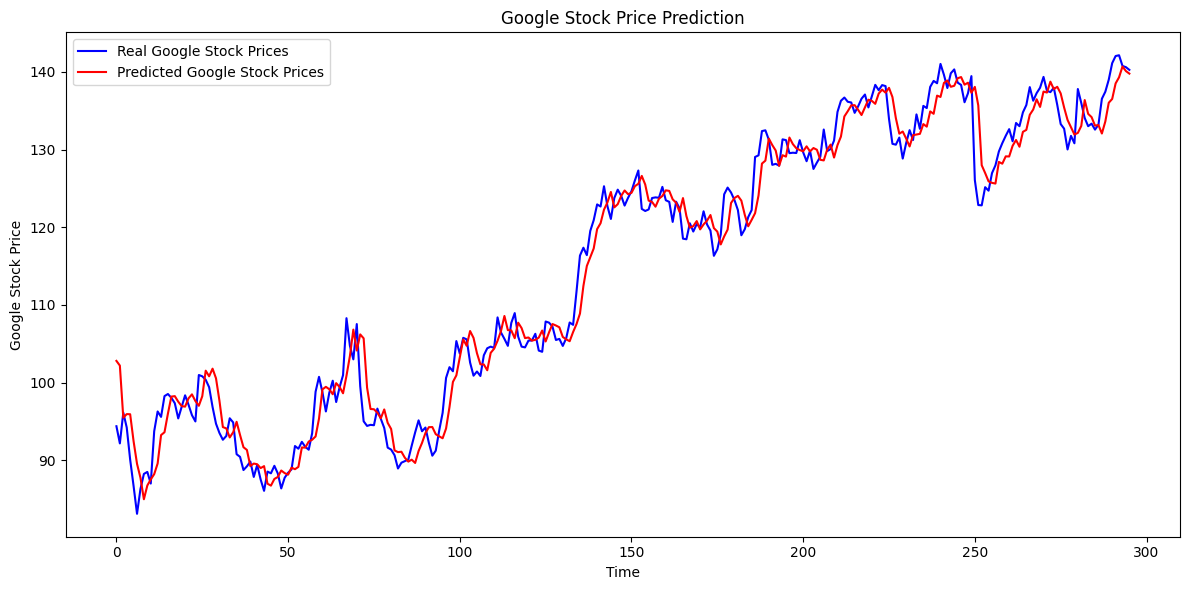

In [16]:
plt.figure(figsize=(12,6))
plt.plot(real_stock_prices,label='Real Google Stock Prices',color='blue')
plt.plot(predicted_stock_prices,label='Predicted Google Stock Prices',color='red')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.tight_layout()
plt.show()